In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path=('/content/drive/MyDrive/quora_duplicate_pair/quora-question-pairs/train.csv/train.csv')
df=pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df.head(1000)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
995,995,1985,1986,I am a straight A student but have no motivati...,My fiancée died recently and it pains my heart...,0
996,996,1987,1988,Which is the best shares to purchase and sale ...,"In Sydney, which company would be the best to ...",0
997,997,1989,1990,I and my girlfriends private partstouched each...,Why most of the cosmetic products don't have p...,0
998,998,1991,1992,Could we use cherenkov atmosphere radiation (w...,Can we map the surface (and the subsurface) of...,1


In [ ]:

df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
print(df['question1'].value_counts())
print('.........................\n\n')
print(df['question2'].value_counts())
print('.........................\n\n')
print(df['is_duplicate'].value_counts())

How do I improve my English speaking?                                                                                50
How does the ban on 500 and 1000 rupee notes helps to identify black money and corruption?                           48
How do I improve my English language?                                                                                47
What should I do to earn money online?                                                                               47
How can changing 500 and 1000 rupee notes end the black money in India?                                              47
                                                                                                                     ..
How well does Google Maps turn-by-turn navigation work with 2G/Edge speeds?                                           1
Why did saina nehwal changed her coach from gopichand to vimal kumar?                                                 1
What tricks can be used during public sp

In [ ]:
print(((df['is_duplicate'].value_counts())/(df['is_duplicate']).count())*100)

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

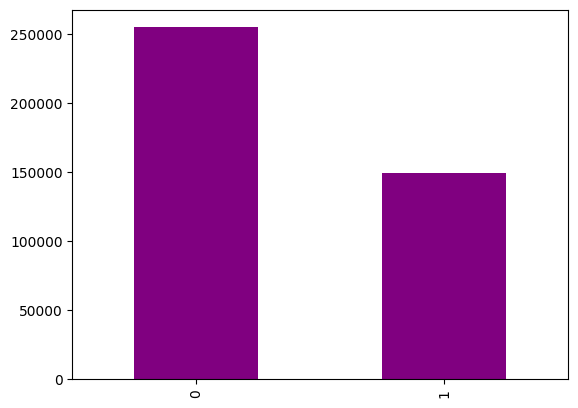

In [ ]:
df['is_duplicate'].value_counts().plot(kind='bar', color='purple')

In [ ]:
qid= pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions in the dataset are ',np.unique(qid).shape[0])
x= qid.value_counts()>1
print("Number of repeated questions in the dataset are ",x[x].sum())

Number of unique questions in the dataset are  537933
Number of repeated questions in the dataset are  111780


[157 120 111 ...   1   1   1]


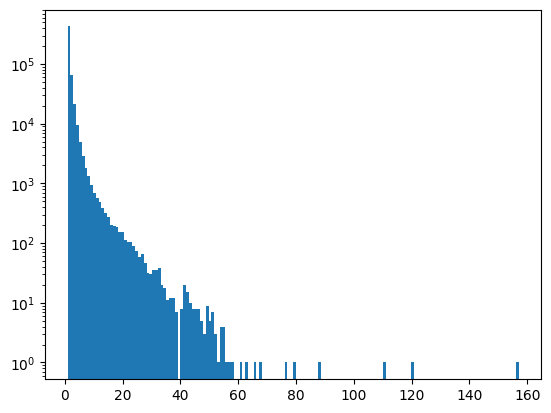

In [ ]:
print(qid.value_counts().values)
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()


In [ ]:
def preprocessing(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    q = re.sub(r'[0-9]','',q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
df['question1'] = df['question1'].apply(preprocessing)
df['question2'] = df['question2'].apply(preprocessing)

In [ ]:
df['q1_len']= df['question1'].str.len()
df['q2_len']= df['question2'].str.len()

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126


In [ ]:
df['q1_num_words']= df['question1'].apply(lambda row: len(str(row).split(" ")))
df['q2_num_words']= df['question2'].apply(lambda row: len(str(row).split(" ")))

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7
...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27


In [ ]:
def common_words(row):
    w1= set(map(lambda word: word.lower().strip(), str(row['question1']).split(" ")))
    w2= set(map(lambda word: word.lower().strip(), str(row['question2']).split(" ")))
    return len(w1 & w2)

In [ ]:
df['common_words']= df.apply(common_words, axis=1)

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14,1
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4
...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,11
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,5
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,3
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,2


In [ ]:
def total_words(row):
    w1= set(map(lambda word: word.lower().strip(), str(row['question1']).split(" ")))
    w2= set(map(lambda word: word.lower().strip(), str(row['question2']).split(" ")))
    return len(w1) + len(w2)

In [ ]:
df['total_words']=df.apply(total_words, axis=1)

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14,1,20
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,11,25
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,5,16
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,3,8
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,2,42


In [ ]:
df['words_share']= round(df['common_words']/df['total_words'],2)
df


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,words_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14,1,20,0.05
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,11,25,0.44
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,5,16,0.31
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,3,8,0.38
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,2,42,0.05


minimum number of characters 0
maximimum number of characters 618
average number characters 58.11703480175122


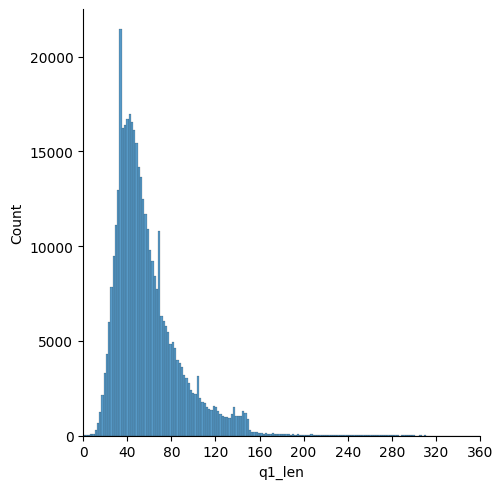

In [ ]:
sns.displot(df['q1_len'], bins=300)
plt.xlim(0,350)
plt.xticks([0,40,80,120,160,200,240,280,320,360])
print('minimum number of characters',df['q1_len'].min())
print('maximimum number of characters', df['q1_len'].max())
print("average number characters", df['q1_len'].mean())

minimum number of characters 0
maximimum number of characters 1158
average number characters 58.68001681960968


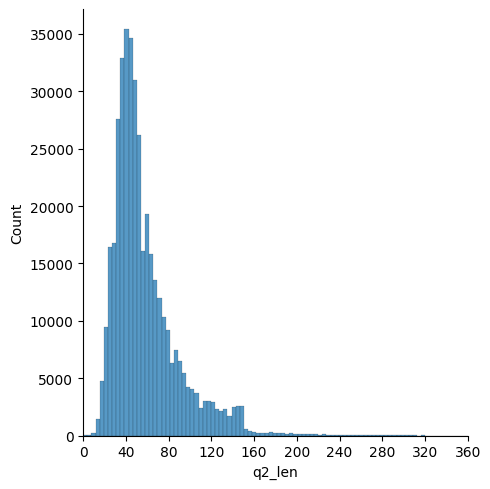

In [ ]:
sns.displot(df['q2_len'], bins=300)
plt.xlim(0,350)
plt.xticks([0,40,80,120,160,200,240,280,320,360])
print('minimum number of characters',df['q2_len'].min())
print('maximimum number of characters', df['q2_len'].max())
print("average number characters", df['q2_len'].mean())

minimum number of words 1
maximimum number of words 146
average number words 11.43381236241312


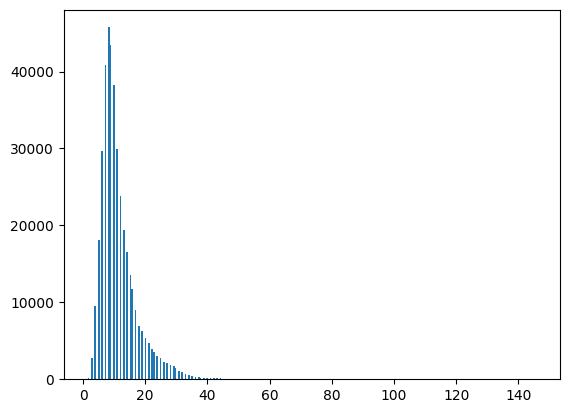

In [ ]:
plt.hist(df['q1_num_words'],bins=270)
print('minimum number of words',df['q1_num_words'].min())
print('maximimum number of words', df['q1_num_words'].max())
print("average number words", df['q1_num_words'].mean())

minimum number of words 1
maximimum number of words 267
average number words 11.693071804892528


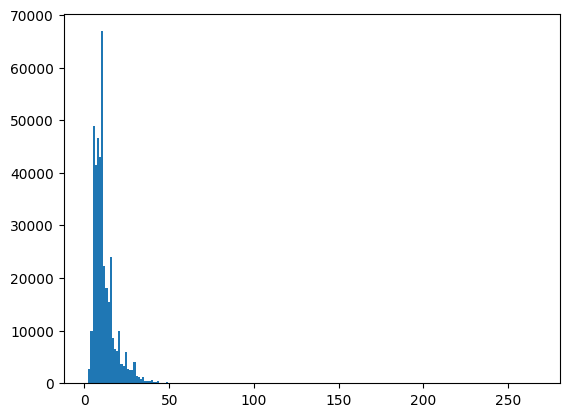

In [ ]:
plt.hist(df['q2_num_words'], bins=210)
# plt.xlim(0,100)
print('minimum number of words',df['q2_num_words'].min())
print('maximimum number of words', df['q2_num_words'].max())
print("average number words", df['q2_num_words'].mean())

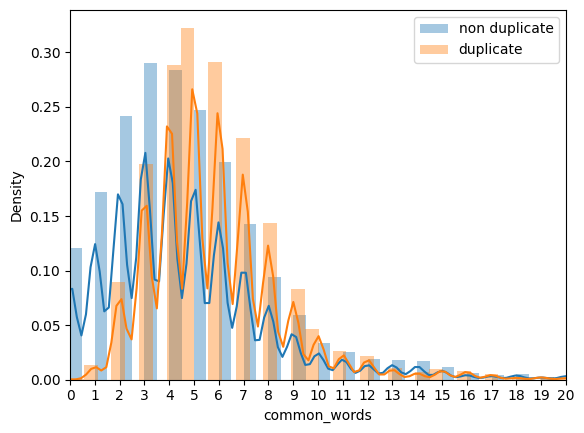

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['common_words'], bins=70,label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['common_words'], bins=70,label='duplicate')
plt.xlim(0,20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.legend()
plt.show()

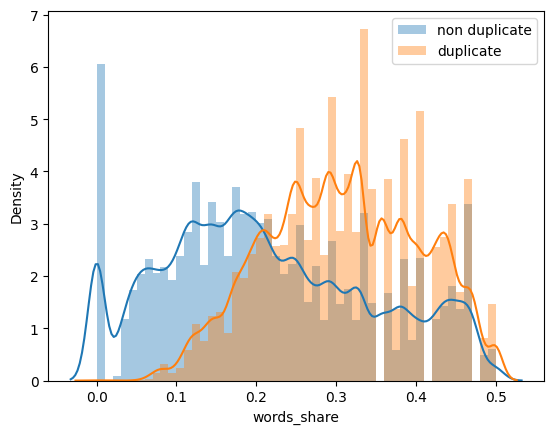

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['words_share'], bins=50,label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['words_share'], bins=50,label='duplicate')
# plt.xlim(0,20)
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.legend()
plt.show()

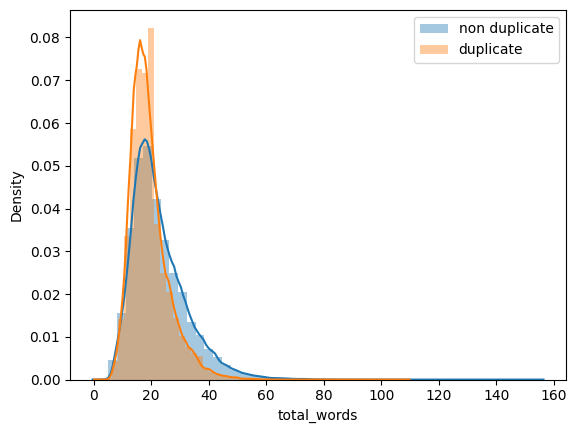

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['total_words'], bins=50,label='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['total_words'], bins=50,label='duplicate')
# plt.xlim(0,20)
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.legend()
plt.show()

In [ ]:
# Advance features

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def fetch_token_features(row):
    q1= row['question1']
    q2= row['question2']

    safe_div=0.0001

    token_features=[0]*8

    stop_words=stopwords.words('english')

    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if(len(q1_tokens)==0 or len(q2_tokens)==0):
        return token_features

    q1_ns_words= set([word for word in q1_tokens if word not in stop_words])
    q2_ns_words= set([word for word in q2_tokens if word not in stop_words])

    q1_s_words= set([word for word in q1_tokens if word in stop_words])
    q2_s_words= set([word for word in q2_tokens if word in stop_words])

    common_nsword_count =len(q1_ns_words.intersection(q2_ns_words))
    common_sword_count =len(q1_s_words.intersection(q2_s_words))

    common_token_count =len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]= common_nsword_count/(min(len(q1_ns_words), len(q2_ns_words)) + safe_div)
    token_features[1]= common_nsword_count/(max(len(q1_ns_words), len(q2_ns_words)) + safe_div)
    token_features[2]= common_sword_count/(min(len(q1_s_words), len(q2_s_words)) + safe_div)
    token_features[3]= common_sword_count/(max(len(q1_s_words), len(q2_s_words)) + safe_div)
    token_features[4]= common_token_count/(min(len( q1_tokens), len(q2_tokens)) + safe_div)
    token_features[5]= common_token_count/(max(len( q1_tokens), len(q2_tokens)) + safe_div)

    token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7]= int(q1_tokens[0]==q2_tokens[0])

    return token_features


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_features= df.apply(fetch_token_features, axis=1)
df['cwc_min']       = list(map(lambda x: x[0], token_features))
df['cwc_max']       = list(map(lambda x: x[1], token_features))
df['csc_min']       = list(map(lambda x: x[2], token_features))
df['csc_max']       = list(map(lambda x: x[2], token_features))
df['ctc_min']       = list(map(lambda x: x[4], token_features))
df['ctc_max']       = list(map(lambda x: x[5], token_features))
df['last_word_eq']  = list(map(lambda x: x[6], token_features))
df['first_word_eq'] = list(map(lambda x: x[7], token_features))

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,26,0.31,0.799984,0.399996,0.749981,0.749981,0.699993,0.466664,0,1
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.399992,0.399996,0.285712,0,1
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14,...,20,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,21,0.19,0.399992,0.199998,0.999950,0.999950,0.571420,0.307690,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,...,25,0.44,0.857131,0.857131,0.999980,0.999980,0.846147,0.785709,1,1
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,...,16,0.31,0.666644,0.666644,0.599988,0.599988,0.624992,0.555549,1,0
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,...,8,0.38,0.999900,0.499975,0.999950,0.999950,0.749981,0.749981,1,1
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,...,42,0.05,0.000000,0.000000,0.124998,0.124998,0.058823,0.040000,0,0


In [ ]:
# !pip install distance
import distance

def fetch_length_features(rows):
    q1 =rows['question1']
    q2 =rows['question2']

    q1_tokens= q1.split()
    q2_tokens= q2.split()

    length_features =[0]*3

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    length_features[0] =(len(q1_tokens) + len(q2_tokens))/2
    length_features[1] =abs(len(q1_tokens) - len(q2_tokens))

    strs= list(distance.lcsubstrings(q1,q2))
    length_features[2] =len(strs)/(min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
length_features= df.apply(fetch_length_features, axis=1)

df['mean_len']                 =list(map(lambda x: x[0], length_features))
df['abs_len_diff']             =list(map(lambda x: x[1], length_features))
df['longest_substr_ratio']     =list(map(lambda x: x[2], length_features))

In [ ]:
# !pip install fuzzywuzzy
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features =df.apply(fetch_fuzzy_features, axis=1)

df['fuzz_ratio']         =list(map(lambda x :x[0], fuzzy_features))
df['fuzz_partial_ratio'] =list(map(lambda x :x[1], fuzzy_features))
df['token_sort_ratio']   =list(map(lambda x :x[2], fuzzy_features))
df['token_set_ratio']    =list(map(lambda x :x[3], fuzzy_features))

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,mean_len,abs_len_diff,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0,1,13.0,2,0.017544,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,0.466664,0,1,12.5,5,0.019608,66,74,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.285712,0,1,12.0,4,0.016949,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math is divided by,0,49,48,12,14,...,0.000000,0,0,9.5,3,0.163265,19,20,29,30
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,0.307690,0,1,10.0,6,0.102564,35,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,...,0.785709,1,1,13.5,1,0.012658,91,87,88,97
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,...,0.555549,1,0,8.5,1,0.024390,72,75,69,79
404287,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,...,0.749981,1,1,4.0,0,0.058824,79,75,79,86
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,...,0.040000,0,0,21.0,8,0.021277,30,34,35,37


In [ ]:
df.shape

(404290, 28)

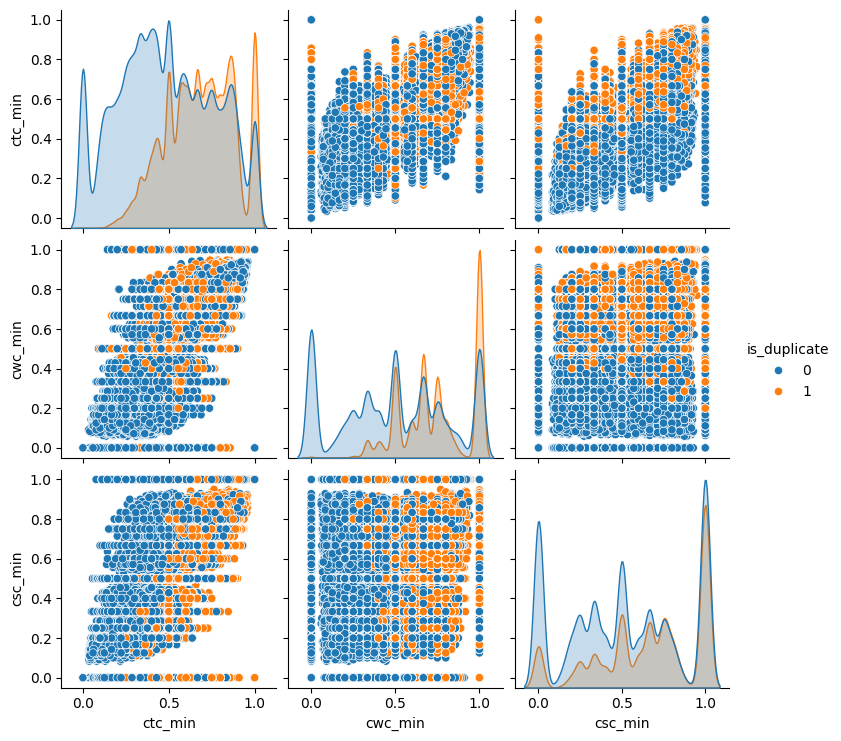

In [ ]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue='is_duplicate')

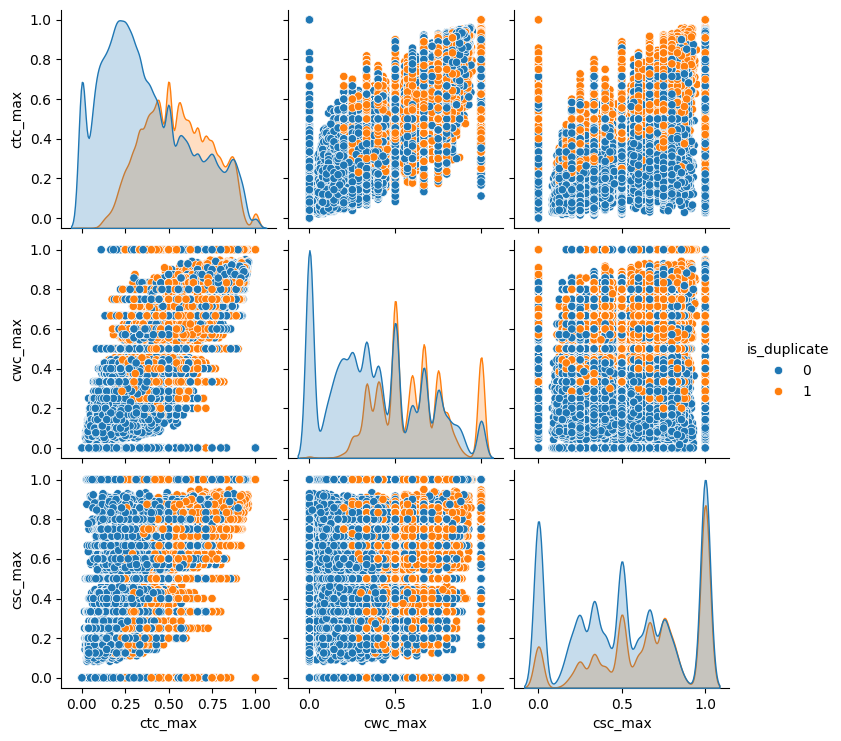

In [ ]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue='is_duplicate')

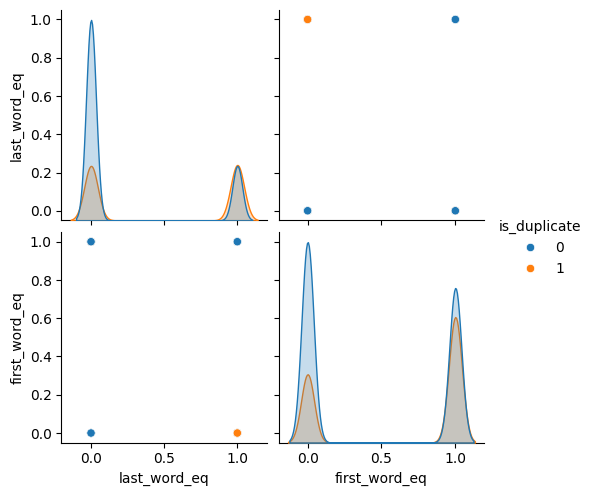

In [ ]:
sns.pairplot(df[['last_word_eq','first_word_eq','is_duplicate']], hue='is_duplicate')

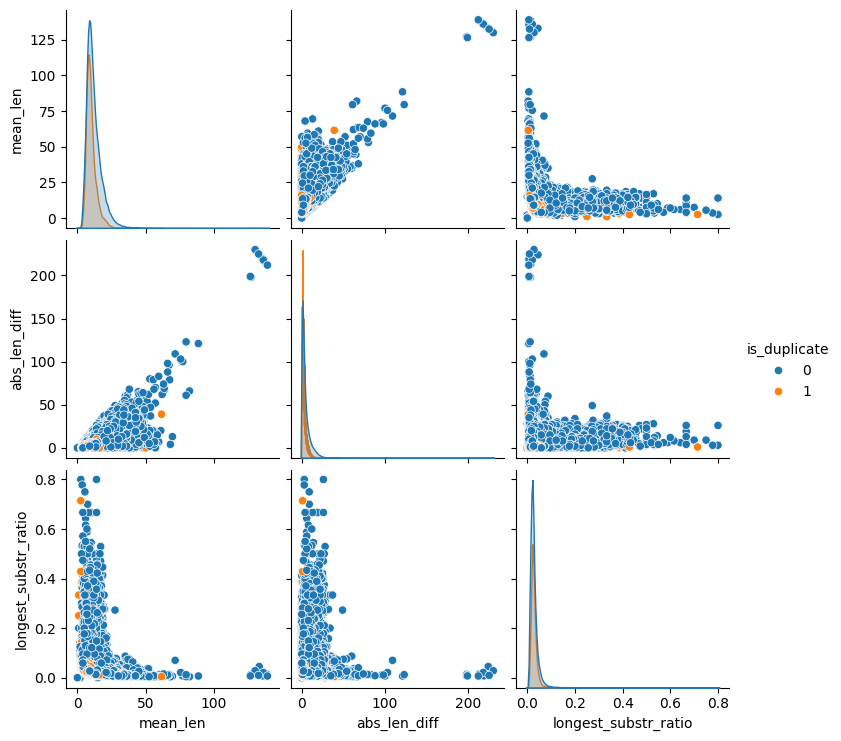

In [ ]:
sns.pairplot(df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']] , hue='is_duplicate')

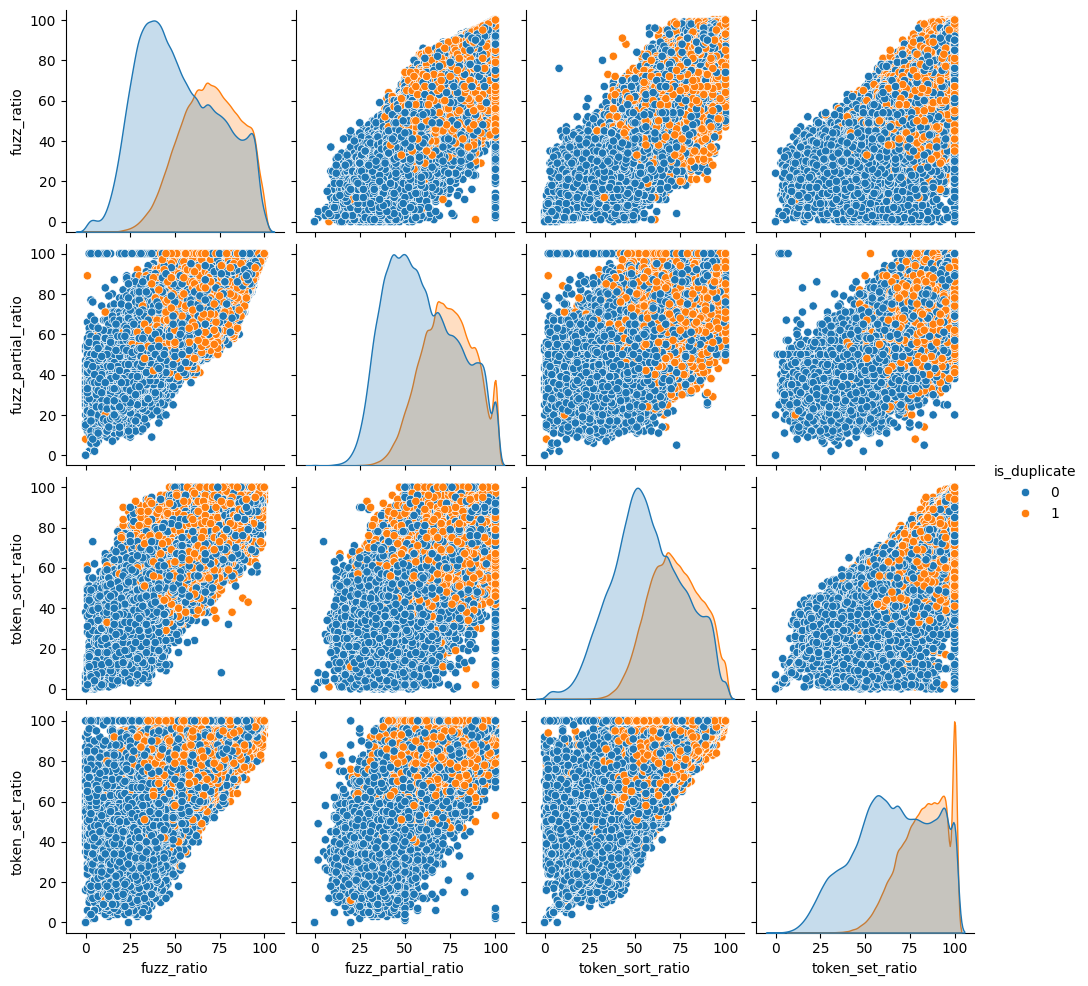

In [ ]:
sns.pairplot(df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue='is_duplicate')


In [ ]:
ques_df =df[['question1','question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when math is divided by
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [ ]:
features_df =df.drop(columns=['id','qid1','qid2','question1','question2'])
features_df.head()
# features_df.shape  //(404290, 23)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,words_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,mean_len,abs_len_diff,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.785709,0,1,13.0,2,0.017544,93,100,93,100
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,0.466664,0,1,12.5,5,0.019608,66,74,63,86
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0,1,12.0,4,0.016949,43,46,63,63
3,0,49,48,12,14,1,20,0.05,0.000000,0.000000,...,0.000000,0,0,9.5,3,0.163265,19,20,29,30
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,0.307690,0,1,10.0,6,0.102564,35,55,47,67


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np
import pandas as pd

# Assuming 'ques_df' is your DataFrame
ques_df = df[['question1', 'question2']]

# Tokenize the sentences into words
tokenized_questions = [
    word_tokenize(question.lower()) for question in
    list(ques_df['question1']) + list(ques_df['question2'])
]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_questions, vector_size=100, window=5, min_count=1, workers=4)

# Transform each question into a vector representation
def question_to_vector(question, model):
    words = word_tokenize(question.lower())
    valid_words = [word for word in words if word in model.wv]

    if not valid_words:
        # Handle the case where all words are not in the vocabulary
        return np.zeros(model.vector_size)

    vector = np.mean([model.wv[word] for word in valid_words], axis=0)
    return vector

# Apply Word2Vec to each question
q1_arr = np.array([question_to_vector(q, word2vec_model) for q in ques_df['question1']])
q2_arr = np.array([question_to_vector(q, word2vec_model) for q in ques_df['question2']])

# Print the shapes of q1_arr and q2_arr
print("Shape of q1_arr:", q1_arr.shape)
print("Shape of q2_arr:", q2_arr.shape)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Shape of q1_arr: (404290, 100)
Shape of q2_arr: (404290, 100)


In [ ]:
word2vec_model.wv.get_normed_vectors().shape

(80545, 100)

In [ ]:
word2vec_model.wv.get_normed_vectors()

array([[-0.12682438,  0.0436366 , -0.06753444, ..., -0.07349682,
        -0.07132529,  0.08943488],
       [-0.04974487,  0.09908828,  0.12223626, ..., -0.11728194,
         0.01156909,  0.06545812],
       [ 0.03009908,  0.10116399, -0.06257953, ...,  0.02565037,
         0.06150375,  0.04253554],
       ...,
       [ 0.01090903,  0.12983969, -0.07149327, ..., -0.08818267,
        -0.01343635, -0.04883382],
       [-0.135189  ,  0.08253247, -0.01769156, ...,  0.12251234,
         0.22701797,  0.10459464],
       [-0.01644815,  0.0872652 , -0.06505105, ..., -0.14032525,
         0.06828678, -0.05282745]], dtype=float32)

In [ ]:
temp_df1=pd.DataFrame(q1_arr)
temp_df2=pd.DataFrame(q2_arr)
temp_df=pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(404290, 200)

In [ ]:
features_df = pd.concat([features_df, temp_df], axis=1)
print(features_df.shape)
features_df.head()

(404290, 223)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,words_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.517623,0.651562,-0.547507,-0.336393,0.607349,0.612625,-0.036627,-0.816188,0.040133,0.314790
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,0.038283,-0.384379,-0.362646,0.422544,0.446746,1.188236,-0.461639,0.294606,0.138026,-0.317940
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.637068,-0.242465,0.224202,0.137081,-0.648523,-0.757096,-0.402894,-0.545123,1.025118,0.259570
3,0,49,48,12,14,1,20,0.05,0.000000,0.000000,...,0.931627,1.078954,0.092456,-0.059870,0.234292,0.213634,-0.880669,-0.509099,0.198399,-0.130043
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,-0.262752,-0.997987,0.143114,1.269704,-0.390820,1.400060,-0.754282,-0.441001,0.426916,-1.249910


In [ ]:
features_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,words_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.517623,0.651562,-0.547507,-0.336393,0.607349,0.612625,-0.036627,-0.816188,0.040133,0.314790
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,0.038283,-0.384379,-0.362646,0.422544,0.446746,1.188236,-0.461639,0.294606,0.138026,-0.317940
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.637068,-0.242465,0.224202,0.137081,-0.648523,-0.757096,-0.402894,-0.545123,1.025118,0.259570
3,0,49,48,12,14,1,20,0.05,0.000000,0.000000,...,0.931627,1.078954,0.092456,-0.059870,0.234292,0.213634,-0.880669,-0.509099,0.198399,-0.130043
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,-0.262752,-0.997987,0.143114,1.269704,-0.390820,1.400060,-0.754282,-0.441001,0.426916,-1.249910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,84,78,14,13,11,25,0.44,0.857131,0.857131,...,0.994620,-0.074726,0.075547,0.207279,0.728936,0.439554,0.459490,-0.417051,0.194189,0.204296
404286,1,40,41,8,9,5,16,0.31,0.666644,0.666644,...,0.211101,-0.727575,1.093269,0.455082,-0.754551,0.694102,-0.575227,0.593362,0.134618,-0.081258
404287,0,16,17,4,4,3,8,0.38,0.999900,0.499975,...,1.202686,0.251324,-0.118799,0.301206,0.590485,0.365895,-0.012259,-0.224654,-0.123271,0.388847
404288,0,93,126,18,27,2,42,0.05,0.000000,0.000000,...,-0.017008,-0.177241,-0.119127,0.461643,-0.235030,0.579202,0.123103,-0.090156,0.797029,-0.488867


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_df.iloc[:,1:].values,features_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8279452867990799

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8143906601696802

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred) ## for random forest model

array([[44437,  6642],
       [ 7270, 22509]])

In [ ]:
# for xgboost model
confusion_matrix(y_test, y_pred1)

array([[43641,  7438],
       [ 7570, 22209]])

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):
  input_query = []

  q1 = preprocessing(q1)
  q2 = preprocessing(q2)

  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(test_common_words(q1,q2))
  input_query.append(test_total_words(q1,q2))
  input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))


  token_features = test_fetch_token_features(q1,q2)
  input_query.extend(token_features)


  length_features = test_fetch_length_features(q1,q2)
  input_query.extend(length_features)

  fuzzy_features = test_fetch_fuzzy_features(q1,q2)
  input_query.extend(fuzzy_features)

  # def question_to_vector(question, model):
  #   words = word_tokenize(question.lower())
  #   valid_words = [word for word in words if word in model.wv]

  #   if not valid_words:
  #       # Handle the case where all words are not in the vocabulary
  #       return np.zeros(model.vector_size)

  #   vector = np.mean([model.wv[word] for word in valid_words], axis=0)
  #   return vector

  q1_vec = np.array([question_to_vector(q1, word2vec_model)])
  q2_vec = np.array([question_to_vector(q2, word2vec_model)])

  # q1_vec = q1_vec.reshape(1, 100)
  # q2_vec = q2_vec.reshape(1, 100)
  input_query.append(0)
  input_query.append(0)


  print("Shape of input_query:", np.array(input_query).shape)
  print("Shape of q1_vec:", q1_vec.shape)
  print("Shape of q2_vec:", q2_vec.shape)
  print(input_query)


  # Ensure consistent dimensions
  # input_query_reshaped = np.array(input_query).reshape(1, -1)

  # return np.hstack((input_query, q1_vec, q2_vec))
  # q1_vec_adjusted = q1_vec[:16, :]



  # conc_arr_w2v = np.hstack((q1_vec_adjusted,q2_vec))
  # print("Shape of conc_arr_w2v:", conc_arr_w2v.shape)

  # input_adjusted_array = np.array(input_query).reshape(1,22)




  return np.hstack((np.array(input_query).reshape(1,22),q1_vec,q2_vec))

In [ ]:
result = query_point_creator('How can I be a good geologist?','What should I do?')
print(result.shape)

Shape of input_query: (22,)
Shape of q1_vec: (1, 100)
Shape of q2_vec: (1, 100)
[29, 16, 1, 11, 0.09, 0.0, 0.0, 0.24999375015624611, 0.1999960000799984, 0.24999375015624611, 0.14285510206997043, 0, 0, 3, 5.5, 0.17647058823529413, 27, 38, 31, 36, 0, 0]
(1, 222)


In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q12 = 'what is the capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q12,q2))

Shape of input_query: (22,)
Shape of q1_vec: (1, 100)
Shape of q2_vec: (1, 100)
[31, 39, 6, 13, 0.46, 0.9999500024998749, 0.6666444451851604, 0.9999750006249845, 0.9999750006249845, 0.9999833336111065, 0.8571306124198226, 1, 1, 1, 6.5, 0.625, 89, 74, 89, 100, 0, 0]


array([1])

In [ ]:
import pickle

pickle.dump(rf, open('model.pkl','wb'))
pickle.dump(word2vec_model, open('w2v.pkl','wb'))
pickle.dump(stopwords, open('stopwords.pkl','wb'))

